## Compile begin.x with the following OPTIONS File:

*# Options for compiling*<br>
**SHELL = /bin/bash**

*# Choose the COMPILER*<br>
**COMPILER = ifort**

*# Choose the Linear Algebra libraries*<br>
**LINALG = MKL**

*# Do you use DEBUG or Optimization Mode? (DEBUG/OPT)*<br>
**MODE = OPT**

*# Turn on omp or mpi (enter TRUE .or. FALSE)?*<br>
**OPENMP = FALSE**<br>
**MPI = FALSE**

*# Choose the MACHINE file*<br>
**MACHINE = HKQAI**

*# Choose HORSFIELD or McWEDA*<br>
**THEORY = MCWEDA**

*# Choose HARRIS, DOGS, or KS (Kohn-Sham)*<br>
*# Note that the KS code only does LDA for now as it uses McWEDA routines.*<br> 
**SCF = DOGS**

*# Choose the DIAGONALIZATION Method - GAMMAD (divide and conquer),*<br>
*# KPOINTS, or MDET (also GAMMA) - Default is GAMMA*<br>
**DIAGONALIZATION = GAMMAD**

*# Choose the XC functional*<br>
**XC = LDA**

### Before we run begin.x - make sure that there is a Fdata directory with a /basis sudirectory. Add the pseudopotentials inside of the /basis subdirectory. 

In [2]:
!ls Fdata/basis

# Result:
# 001.pp  001++.pp  008.pp  008++.pp  022.pp  022++.pp

001.pp	001++.pp  008.pp  008++.pp  022.pp  022++.pp


In [3]:
!more begin.inp

# Result:
# James P. Lewis
# H-begin.inp
# O-begin.inp
# Ti-begin.inp

James P. Lewis
H-begin.inp
O-begin.inp
Ti-begin.inp


In [13]:
!more Fdata.inp

# Result:
# 3                                     ! Number of species
# 1                                     ! atomic numbers
# 8
# 14
# Fdata                                 ! Fdata location

3                                     ! Number of species
1                                     ! atomic numbers
8
22
Fdata                                 ! Fdata Location


### The cutoffs here reflect a 0.15 Ryd excitation - determined after running begin-looprc.x

In [8]:
!cat H-begin.inp

# Result:
# Hydrogen                 atom name
# H                        atom abbreviation
# 1                        atomic number
# 1.008                    atomic mass
# 1.0                      number of valence electrons
# 3                        exchange correlation
# 1                        number of shells
# 0                        angular momentum for s shell
# 1.0                      Qneutral - number of electrons in s shell
# 1.0                      number of electrons in s shell
# 3.75                     cutoff radius for s shell
# 0                        use excited states
# 0                        optimize basis set with x-confinement potential

Hydrogen                 atom name
H                        atom abbreviation
1                        atomic number
1.008                    atomic mass
1.0                      number of valence electrons
3                        exchange correlation
1                        number of shells
0                        angular momentum for s shell
1.0                      Qneutral - number of electrons in s shell
1.0                      number of electrons in s shell
3.75                     cutoff radius for s shell
0                        use excited states
0                        optimize basis set with x-confinement potential


In [9]:
!cat O-begin.inp

# Result
# Oxygen                   atom name
# O                        atom abbreviation
# 8                        atomic number
# 15.999                   atomic mass
# 6.0                      number of valence electrons
# 3                        exchange correlation
# 2                        number of shells
# 0                        angular momentum for s shell
# 2.0                      Qneutral - number of electrons in s shell
# 2.0                      number of electrons in s shell
# 3.35                     cutoff radius for s shell
# 1                        angular momentum for p shell
# 4.0                      Qneutral - number of electrons in p shell
# 4.0                      number of electrons in p shell
# 3.80                     cutoff radius for p shell
# 0                        use excited states
# 0                        optimize basis set with x-confinement potential

Oxygen                   atom name
O                        atom abbreviation
8                        atomic number
15.999                   atomic mass
6.0                      number of valence electrons
3                        exchange correlation
2                        number of shells
0                        angular momentum for s shell
2.0                      Qneutral - number of electrons in s shell
2.0                      number of electrons in s shell
3.35                     cutoff radius for s shell
1                        angular momentum for p shell
4.0                      Qneutral - number of electrons in p shell
4.0                      number of electrons in p shell
3.80                     cutoff radius for p shell
0                        use excited states
0                        optimize basis set with x-confinement potential


In [10]:
!cat Ti-begin.inp

# Result
# Titanium                 atom name
# Ti                       atom abbreviation
# 22                       atomic number
# 47.867                   atomic mass
# 4.0                      number of valence electrons
# 3                        exchange correlation
# 3                        number of shells
# 0                        angular momentum for s shell
# 2.0                      Qneutral - number of electrons in s shell
# 2.0                      number of electrons in s shell
# 5.80                     cutoff radius for s shell
# 1                        angular momentum for p shell
# 0.0                      Qneutral - number of electrons in p shell
# 0.0                      number of electrons in p shell
# 6.20                     cutoff radius for p shell
# 2                        angular momentum for d shell
# 2.0                      Qneutral - number of electrons in d shell
# 2.0                      number of electrons in d shell
# 5.40                     cutoff radius for d shell
# 0                        use excited states
# 1                        optimize basis set with x-confinement potential
# 5.0                      Vo for s shell
# 0.0                      r0 for s shell
# 10.0                     Vo for p shell
# 0.5                      r0 for p shell
# 0.0                      Vo for d shell
# 0.0                      r0 for d shell

Titanium                 atom name
Ti                       atom abbreviation
22                       atomic number
47.867                   atomic mass
4.0                      number of valence electrons
3                        exchange correlation
3                        number of shells
0                        angular momentum for s shell
2.0                      Qneutral - number of electrons in s shell
2.0                      number of electrons in s shell
5.80                     cutoff radius for s shell
1                        angular momentum for p shell
0.0                      Qneutral - number of electrons in p shell
0.0                      number of electrons in p shell
6.20                     cutoff radius for p shell
2                        angular momentum for d shell
2.0                      Qneutral - number of electrons in d shell
2.0                      number of electrons in d shell
5.40                     cutoff radius for d shell
0                    

In [12]:
# Run begin.x
!./begin.x

### Plot the resulting wavefunctions and Hartree potentials

['001.wf-s0.dat']


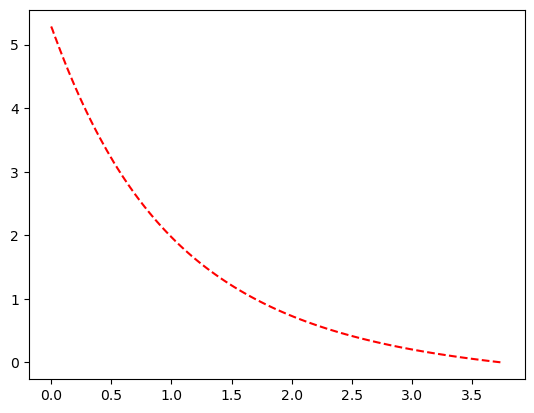

['001.na.dat', '001.na-s0.dat']


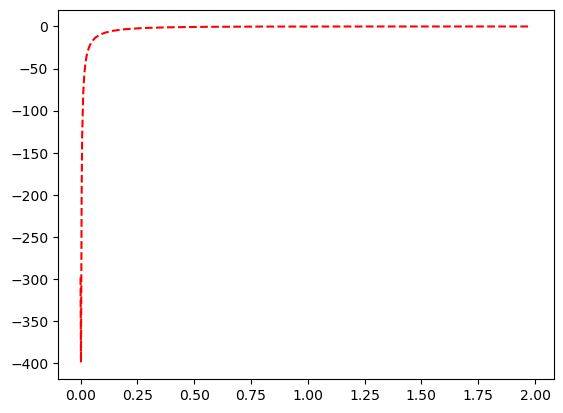

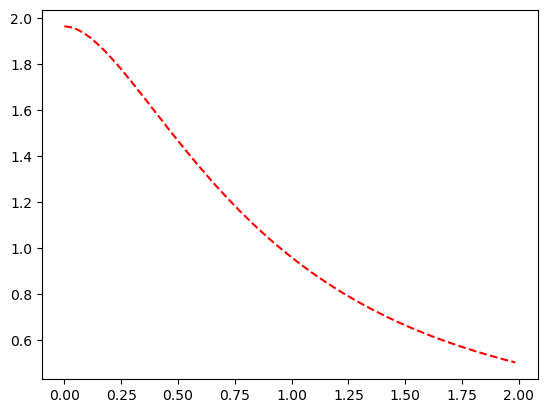

In [2]:
import csv
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Plot wavefunctions
files = glob.glob('001.wf*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()
    
# Plot Hartree potentials
files = glob.glob('001.na*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()

['008.wf-p0.dat', '008.wf-s0.dat']


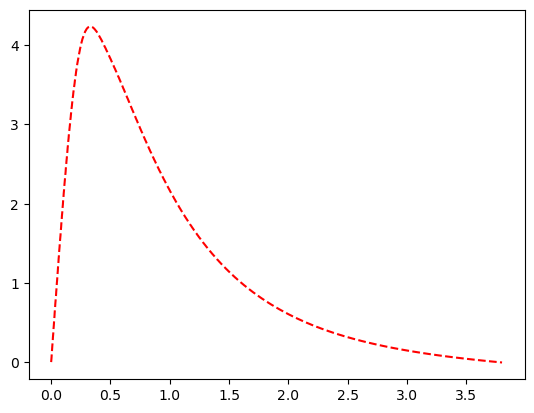

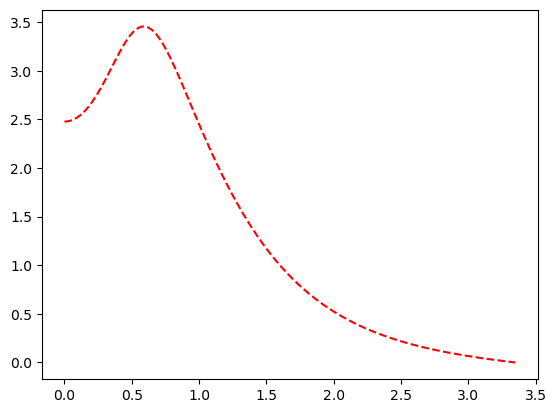

['008.na.dat', '008.na-p0.dat', '008.na-s0.dat']


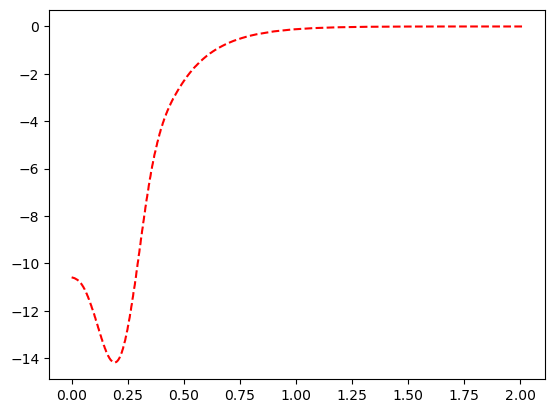

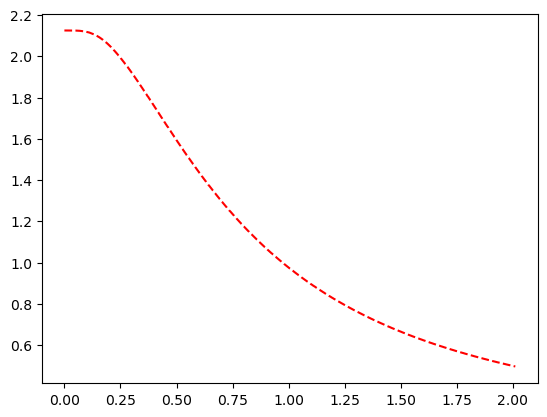

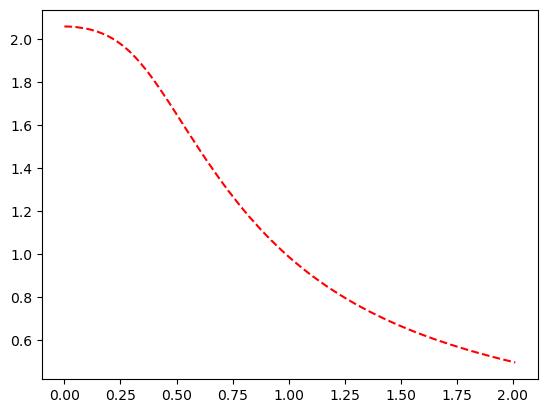

In [4]:
import csv
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Plot wavefunctions
files = glob.glob('008.wf*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()
    
# Plot Hartree potentials
files = glob.glob('008.na*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()

['022.wf-s0.dat', '022.wf-p0.dat', '022.wf-d0.dat']


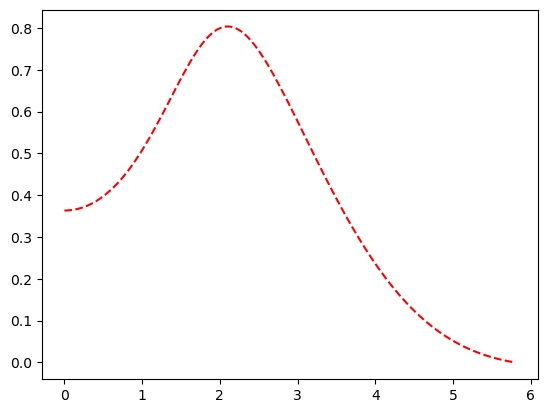

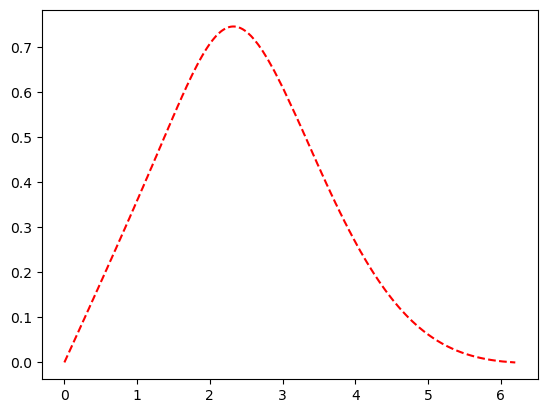

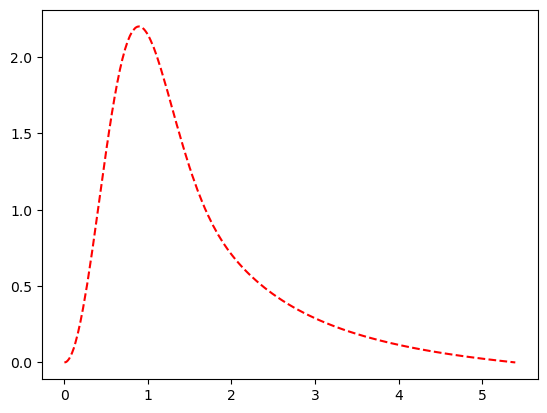

['022.na.dat', '022.na-s0.dat', '022.na-d0.dat', '022.na-p0.dat']


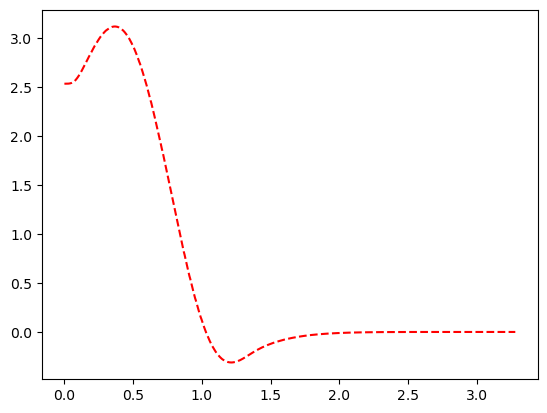

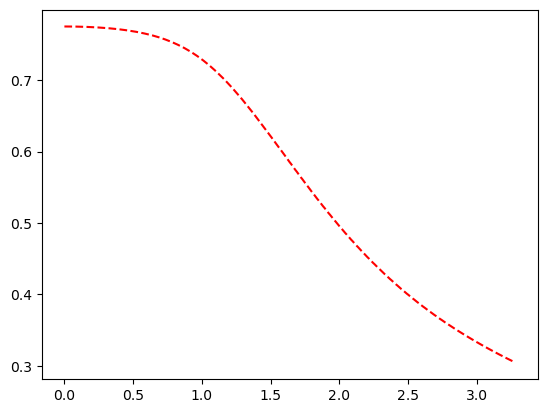

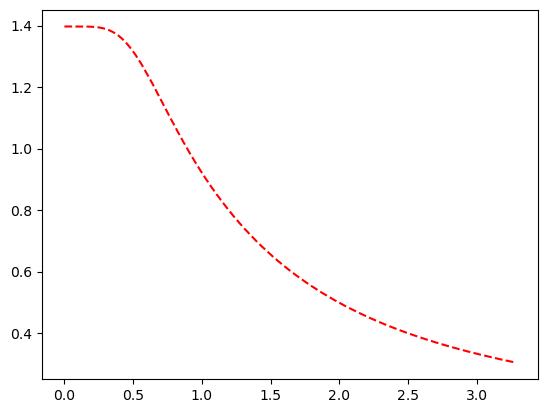

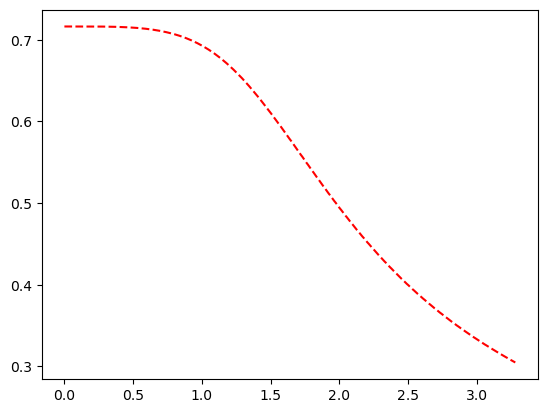

In [3]:
import csv
import glob

import pandas as pd
import matplotlib.pyplot as plt

# Plot wavefunctions
files = glob.glob('022.wf*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()
    
# Plot Hartree potentials
files = glob.glob('022.na*.dat')
print(files)

### Loop over all files
for file in files:
    data = pd.read_csv(file,sep=r'\s+',header=None)
    data = pd.DataFrame(data)

    x = data[0]
    y = data[1]
    plt.plot(x, y,'r--')
    plt.show()

## Compile create.x with the following OPTIONS File:

*# Options for compiling*<br>
**SHELL = /bin/bash**

*# Choose the COMPILER*<br>
**COMPILER = ifort**

*# Choose the Linear Algebra libraries*<br>
**LINALG = MKL**

*# Do you use DEBUG or Optimization Mode? (DEBUG/OPT)*<br>
**MODE = OPT**

*# Turn on omp or mpi (enter TRUE .or. FALSE)?*<br>
**OPENMP = FALSE**<br>
**MPI = TRUE**

*# Choose the MACHINE file*<br>
**MACHINE = HKQAI**

*# Choose HORSFIELD or McWEDA*<br>
**THEORY = MCWEDA**

*# Choose HARRIS, DOGS, or KS (Kohn-Sham)*<br>
*# Note that the KS code only does LDA for now as it uses McWEDA routines.*<br> 
**SCF = DOGS**

*# Choose the DIAGONALIZATION Method - GAMMAD (divide and conquer),*<br>
*# KPOINTS, or MDET (also GAMMA) - Default is GAMMA*<br>
**DIAGONALIZATION = GAMMAD**

*# Choose the XC functional*<br>
**XC = LDA**


In [153]:
# Run create-MPI.x
!mpirun -np 16 ./create.x

In [21]:
# Move the Fdata to some appropriately named Fdata
!mv Fdata Fdata-McWEDA-0.15-3SN.Hs3.75.Os3.35p3.80-3SNP.Tis5.80p6.20d5.40

## Preparation

In [1]:
!cd ~/thunder2024/fireball/tests/12.copper

In [8]:
import os
import sys
import ase
import numpy as np

from thunder_ase.fireball import Fireball
from ase.build import molecule
from ase import units

# Socket Communication
from ase.calculators.socketio import SocketIOCalculator

# ase BFGS optimization
from ase.optimize import BFGS

# ase MD modules
from ase.md.npt import NPT
from ase.md.nvtberendsen import NVTBerendsen
from ase.constraints import Hookean

## NVT Ensemble - Cu Nanoparticle (79 atoms)

In [9]:
# clean last run result
!./clean.com

In [10]:
# Read Cu nanoparticle structure
atoms = ase.io.read('init-NP.xyz')

# Sockets
host = 'thunder-ase-Cu-NP'

max_step = 100
kwargs = {'nstepi':1,
          'nstepf':max_step+1,
          'efermi_T': 600.0,
          'ipi': 1,
          'inet': 0,
          'host': 'thunder-ase-Cu-NP',
          'iwriteout_charges': 1,
          }
fireball = Fireball(command='./fireball-ase.x', Fdata_path='Fdata', **kwargs)

dyn = BFGS(atoms, trajectory='opt.traj', logfile='opt.log')

fireball.dynamics(dyn, steps=max_step)    

 Error in reading from socket


 ENDED 
